In [1]:
import pandas as pd
import pickle
from pathlib import Path
import os
import pandas as pd
import scanpy as sc
import cellink as cl
from cellink.tl._burden_testing import *

/opt/modules/i12g/anaconda/envs/mzb_scgenetics/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Read all results for chr 14-22

In [2]:
chr1_all_results=pd.read_pickle("/s/project/sys_gen_students/2024_2025/project04_rare_variant_sc/output/association/chr1_all_results.pkl")
chr2_all_results=pd.read_pickle("/s/project/sys_gen_students/2024_2025/project04_rare_variant_sc/output/association/chr2_all_results.pkl")
chr3_all_results=pd.read_pickle("/s/project/sys_gen_students/2024_2025/project04_rare_variant_sc/output/association/chr3_all_results.pkl")
chr4_all_results=pd.read_pickle("/s/project/sys_gen_students/2024_2025/project04_rare_variant_sc/output/association/chr4_all_results.pkl")
chr5_all_results=pd.read_pickle("/s/project/sys_gen_students/2024_2025/project04_rare_variant_sc/output/association/chr5_all_results.pkl")
chr6_all_results=pd.read_pickle("/s/project/sys_gen_students/2024_2025/project04_rare_variant_sc/output/association/chr6_all_results.pkl")
chr7_all_results=pd.read_pickle("/s/project/sys_gen_students/2024_2025/project04_rare_variant_sc/output/association/chr7_all_results.pkl")
chr8_all_results=pd.read_pickle("/s/project/sys_gen_students/2024_2025/project04_rare_variant_sc/output/association/chr8_all_results.pkl")
chr9_all_results=pd.read_pickle("/s/project/sys_gen_students/2024_2025/project04_rare_variant_sc/output/association/chr9_all_results.pkl")
chr10_all_results=pd.read_pickle("/s/project/sys_gen_students/2024_2025/project04_rare_variant_sc/output/association/chr10_all_results.pkl")
chr11_all_results=pd.read_pickle("/s/project/sys_gen_students/2024_2025/project04_rare_variant_sc/output/association/chr11_all_results.pkl")
chr12_all_results=pd.read_pickle("/s/project/sys_gen_students/2024_2025/project04_rare_variant_sc/output/association/chr12_all_results.pkl")
chr13_all_results=pd.read_pickle("/s/project/sys_gen_students/2024_2025/project04_rare_variant_sc/output/association/chr13_all_results.pkl")
chr14_all_results=pd.read_pickle("/s/project/sys_gen_students/2024_2025/project04_rare_variant_sc/output/association/chr14_all_results.pkl")
chr15_all_results=pd.read_pickle("/s/project/sys_gen_students/2024_2025/project04_rare_variant_sc/output/association/chr15_all_results.pkl")
chr16_all_results=pd.read_pickle("/s/project/sys_gen_students/2024_2025/project04_rare_variant_sc/output/association/chr16_all_results.pkl")
chr17_all_results=pd.read_pickle("/s/project/sys_gen_students/2024_2025/project04_rare_variant_sc/output/association/chr17_all_results.pkl")
chr18_all_results=pd.read_pickle("/s/project/sys_gen_students/2024_2025/project04_rare_variant_sc/output/association/chr18_all_results.pkl")
chr19_all_results=pd.read_pickle("/s/project/sys_gen_students/2024_2025/project04_rare_variant_sc/output/association/chr19_all_results.pkl")
chr20_all_results=pd.read_pickle("/s/project/sys_gen_students/2024_2025/project04_rare_variant_sc/output/association/chr20_all_results.pkl")
chr21_all_results=pd.read_pickle("/s/project/sys_gen_students/2024_2025/project04_rare_variant_sc/output/association/chr21_all_results.pkl")
chr22_all_results=pd.read_pickle("/s/project/sys_gen_students/2024_2025/project04_rare_variant_sc/output/association/chr22_all_results.pkl")


In [3]:
all_results = pd.concat([chr1_all_results, 
                    chr2_all_results,
                   chr3_all_results,
                   chr4_all_results,
                   chr5_all_results,
                    chr6_all_results, 
                    chr7_all_results,
                   chr8_all_results,
                   chr9_all_results,
                   chr10_all_results,
                    chr11_all_results,
                   chr12_all_results,
                   chr13_all_results,
                    chr14_all_results, 
                    chr15_all_results,
                   chr16_all_results,
                   chr17_all_results,
                   chr18_all_results,
                   chr19_all_results,
                   chr20_all_results,
                   chr21_all_results,
                   chr22_all_results,], ignore_index=True)

### correcting p values

In [4]:
from statsmodels.stats.multitest import multipletests
def FDR_correction(association_results):
    """
    association_results: pd.DataFrame, results from burden_test/ output written in run_burden_ass.py
    
    returns: - df_final: pd.DataFrame, association_results, sorted by celltype and burden type
                                        added column "FDR corrected" values and "significant"
             - df_to_plot: pd.DataFrame, summary of # significant egenes per cell type and burden type
    """
   
    df=association_results.copy()
    df_to_plot = pd.DataFrame(columns=['celltype', 'annotation', 'n'])
    
    df_final=[]
    for celltype in df["cell_type"].unique():
        df_annotations={}
        for annotation in df["burden_type"].unique():
            df_annotations[annotation] = df[(df["cell_type"] == celltype) & (df["burden_type"]==annotation)]
            df_annotations[annotation] = df_annotations[annotation].dropna(how='all')
            # FDR correction
            df_annotations[annotation]["significant"], df_annotations[annotation]["FDR_corrected"], _, _ = multipletests(df_annotations[annotation]["pvalue"], alpha=0.05, method='fdr_bh')
            
            df_to_plot = pd.concat([df_to_plot, pd.DataFrame({
                    'celltype': [celltype],
                    'annotation': [annotation],
                    'n': [len(df_annotations[annotation][df_annotations[annotation]["significant"]])]
                })], ignore_index=True)
            df_annotations[annotation]["celltype-annotation"]= f"{celltype}-{annotation}"
            df_final.append(df_annotations[annotation]) 
            
    df_final=pd.concat(df_final)
    
    df_to_plot['celltype_annotation'] = df_to_plot['celltype'] + "_" + df_to_plot['annotation']
    df_to_plot
    return df_final, df_to_plot

from plotnine import *
def plot_egenes(df_to_plot):
    """
    df_to_plot: pd.DataFrame, as output[1] of  FDR_correction()
    returns: plot, grouped barplot # egenes per cell type and burden
    """
    zero_types = list(df_to_plot.query("n==0")["celltype_annotation"])
    # Filter out the rows where `n` is 0 and create the plot
    plot = (
        ggplot(df_to_plot.query("celltype_annotation not in @zero_types"), 
               aes(x='celltype', y='n', fill='annotation'))  # Specify x, y, and fill variables
        + geom_bar(stat="identity", position="dodge")  # Use position="dodge" for grouped bars
        + theme_classic()  # Optional: use a clean theme
        + theme(
            axis_text_x=element_text(angle=45, hjust=1, vjust=1),
            figure_size=(8, 4)
        )
        + labs(
            y="Number of E-Genes", 
            x="", 
            fill="Burden Annotation"
        )
        # Optional: Customize colors manually
        # + scale_fill_manual(values=['darkred', "grey", "blue", "green"], 
        #     labels=["GENE_TSS_DISTANCE", "GENE_TSS_DISTANCE_SAIGE", "CADD_PHRED", "DNA_LM_down","DNA_LM_up","DNA_LM_mixed", "MAF_beta_1.25"])
    )
    return(plot)


In [5]:
df_final, df_to_plot = FDR_correction(all_results)

In [25]:
df_final_1, df_to_plot_1 = FDR_correction(chr1_all_results)
df_final_2, df_to_plot_2 = FDR_correction(chr2_all_results)
df_final_3, df_to_plot_3 = FDR_correction(chr3_all_results)
df_final_4, df_to_plot_4 = FDR_correction(chr4_all_results)
df_final_5, df_to_plot_5 = FDR_correction(chr5_all_results)
df_final_6, df_to_plot_6 = FDR_correction(chr6_all_results)
df_final_7, df_to_plot_7 = FDR_correction(chr7_all_results)
df_final_8, df_to_plot_8 = FDR_correction(chr8_all_results)
df_final_9, df_to_plot_9 = FDR_correction(chr9_all_results)
df_final_10, df_to_plot_10 = FDR_correction(chr10_all_results)
df_final_11, df_to_plot_11 = FDR_correction(chr11_all_results)
df_final_12, df_to_plot_12 = FDR_correction(chr12_all_results)
df_final_13, df_to_plot_13 = FDR_correction(chr13_all_results)

df_final_14, df_to_plot_14 = FDR_correction(chr14_all_results)
df_final_15, df_to_plot_15 = FDR_correction(chr15_all_results)
df_final_16, df_to_plot_16 = FDR_correction(chr16_all_results)
df_final_17, df_to_plot_17 = FDR_correction(chr17_all_results)
df_final_18, df_to_plot_18 = FDR_correction(chr18_all_results)
df_final_19, df_to_plot_19 = FDR_correction(chr19_all_results)
df_final_20, df_to_plot_20 = FDR_correction(chr20_all_results)
df_final_21, df_to_plot_21 = FDR_correction(chr21_all_results)
df_final_22, df_to_plot_22 = FDR_correction(chr22_all_results)

In [26]:
all_results = pd.concat([chr1_all_results, 
                    chr2_all_results,
                   chr3_all_results,
                   chr4_all_results,
                   chr5_all_results,
                    chr6_all_results, 
                    chr7_all_results,
                   chr8_all_results,
                   chr9_all_results,
                   chr10_all_results,
                    chr11_all_results,
                   chr12_all_results,
                   chr13_all_results,
                    chr14_all_results, 
                    chr15_all_results,
                   chr16_all_results,
                   chr17_all_results,
                   chr18_all_results,
                   chr19_all_results,
                   chr20_all_results,
                   chr21_all_results,
                   chr22_all_results,], ignore_index=True)

In [30]:
all_results.to_csv('/s/project/sys_gen_students/2024_2025/project04_rare_variant_sc/output/association/all_results.csv', index=False) 

In [27]:
df_final, df_to_plot = FDR_correction(all_results)

In [31]:
df_final.to_csv('/s/project/sys_gen_students/2024_2025/project04_rare_variant_sc/output/association/all_results_FDR_corrected.csv', index=False) 

In [41]:
df_to_plot_filtered =df_to_plot[~df_to_plot["celltype"].isin(["Erythrocytes", "Platelets"])]

In [32]:
df_to_plot.to_csv('/s/project/sys_gen_students/2024_2025/project04_rare_variant_sc/output/association/all_results_summary.csv', index=False) 

[2025-01-30 08:58:23,643] INFO:matplotlib.font_manager: Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


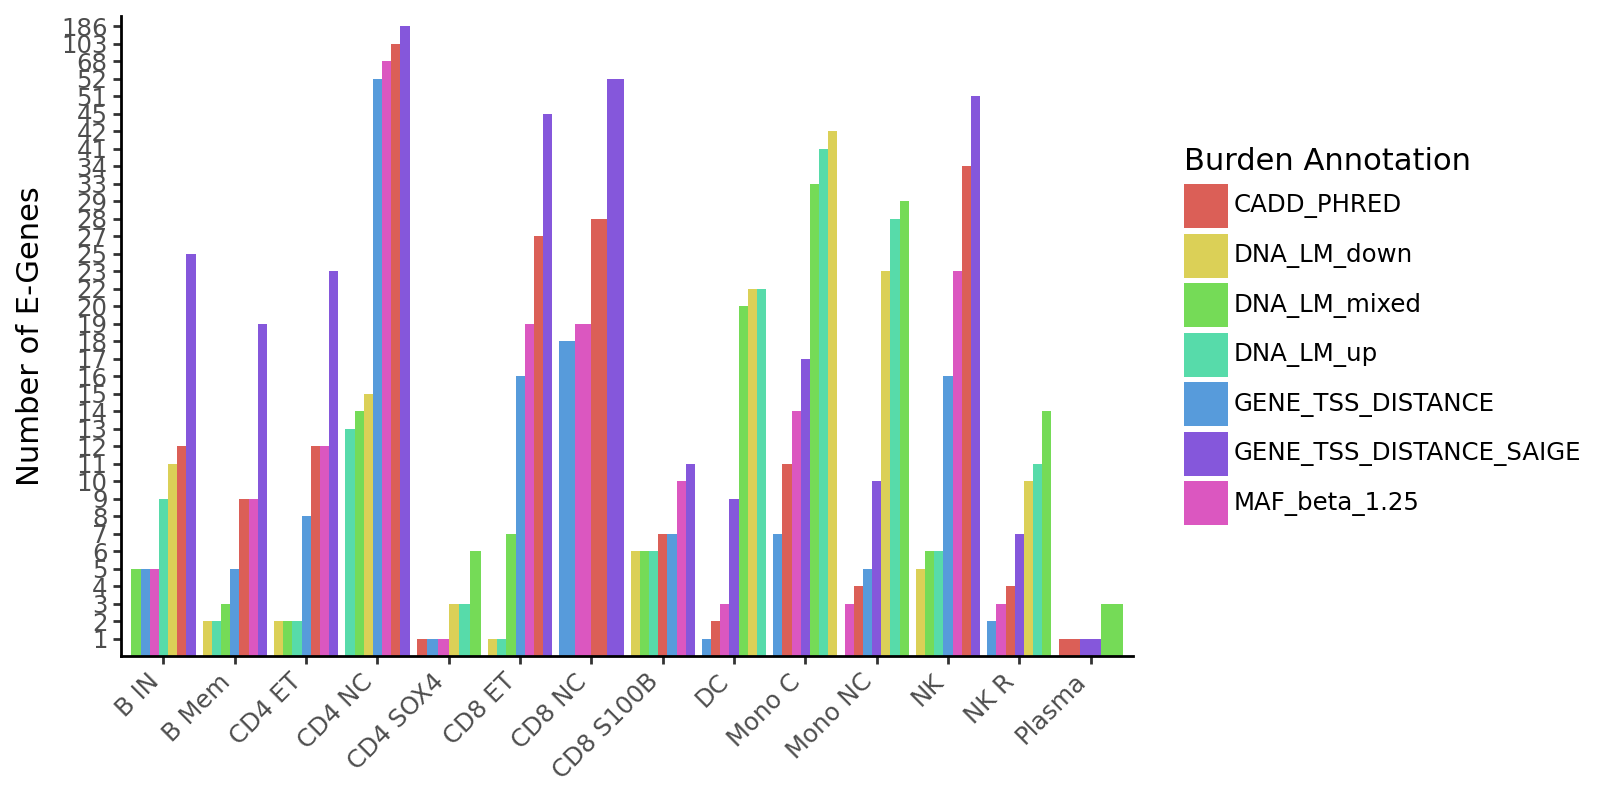

In [6]:
test=df_to_plot[~df_to_plot["celltype"].isin(["Erythrocytes", "Platelets"])]
plot_egenes(test)

[2025-01-28 15:17:40,908] INFO:matplotlib.font_manager: Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


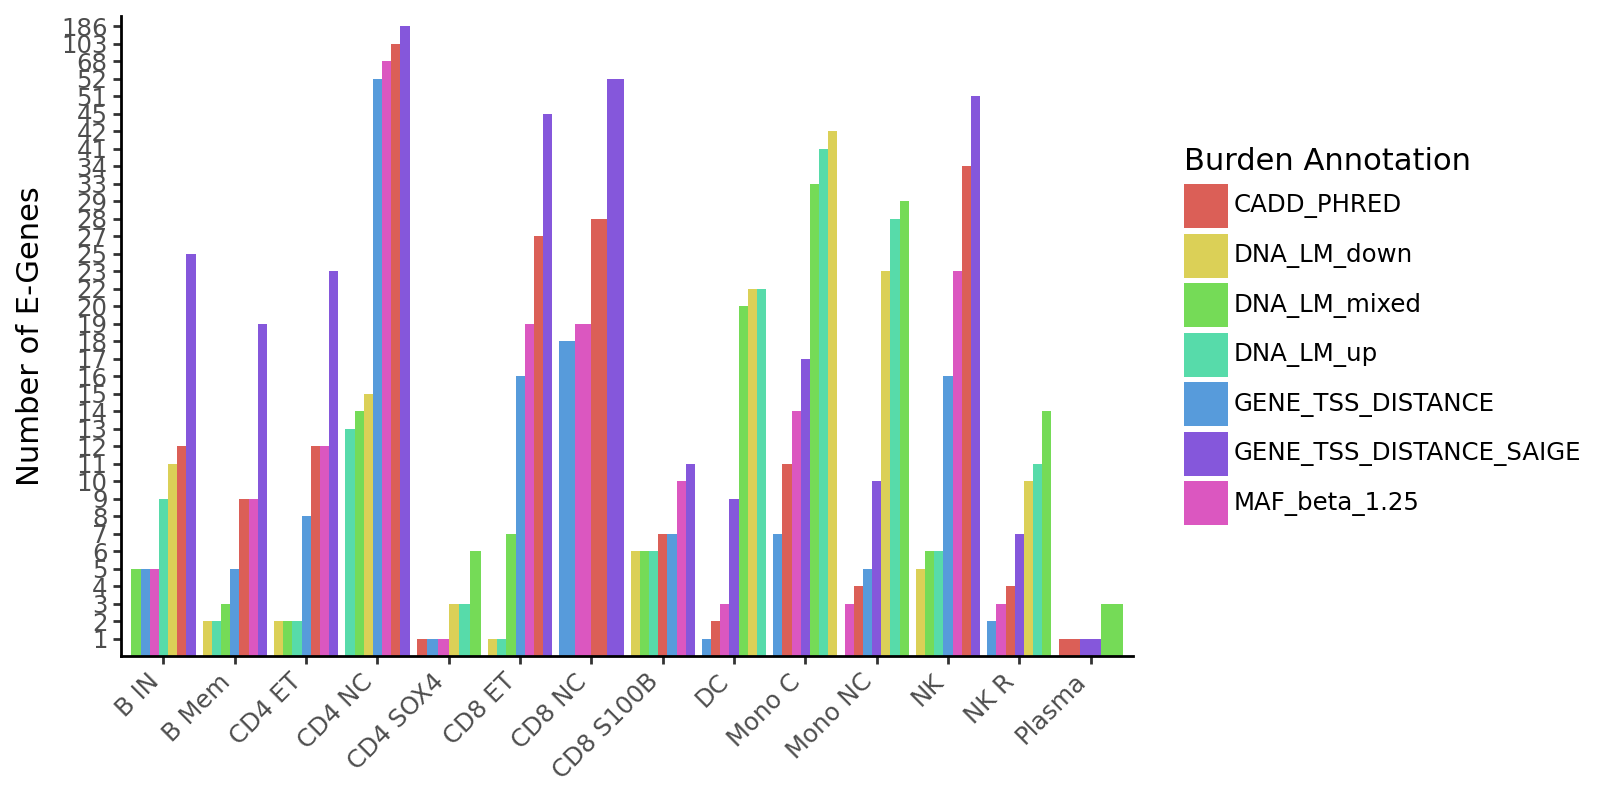

In [42]:
plot_egenes(df_to_plot_filtered)

## per chromosome

[2025-01-28 14:55:03,275] INFO:matplotlib.font_manager: Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


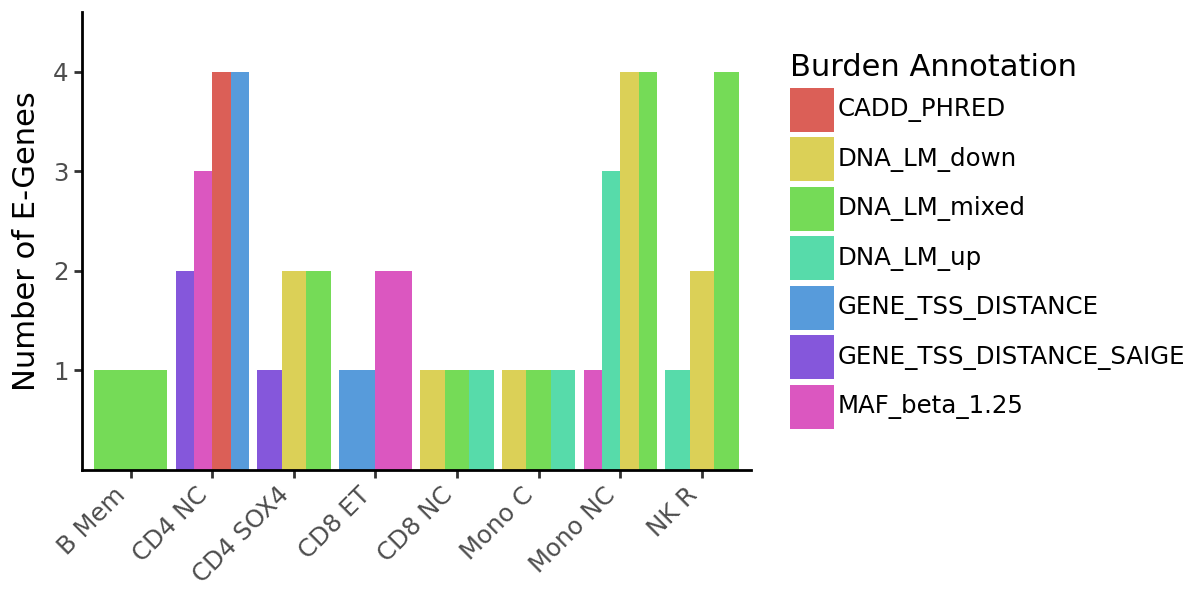

In [12]:
plot_egenes(df_to_plot_14)

[2025-01-28 14:55:16,524] INFO:matplotlib.font_manager: Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


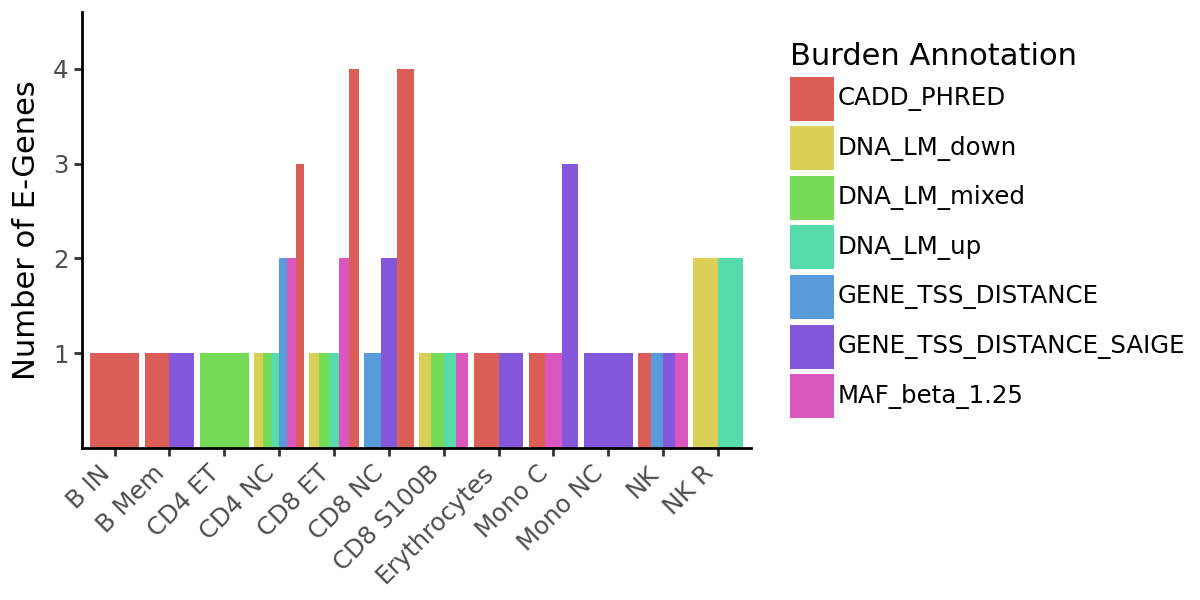

In [13]:
plot_egenes(df_to_plot_15)

[2025-01-28 14:57:27,730] INFO:matplotlib.font_manager: Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


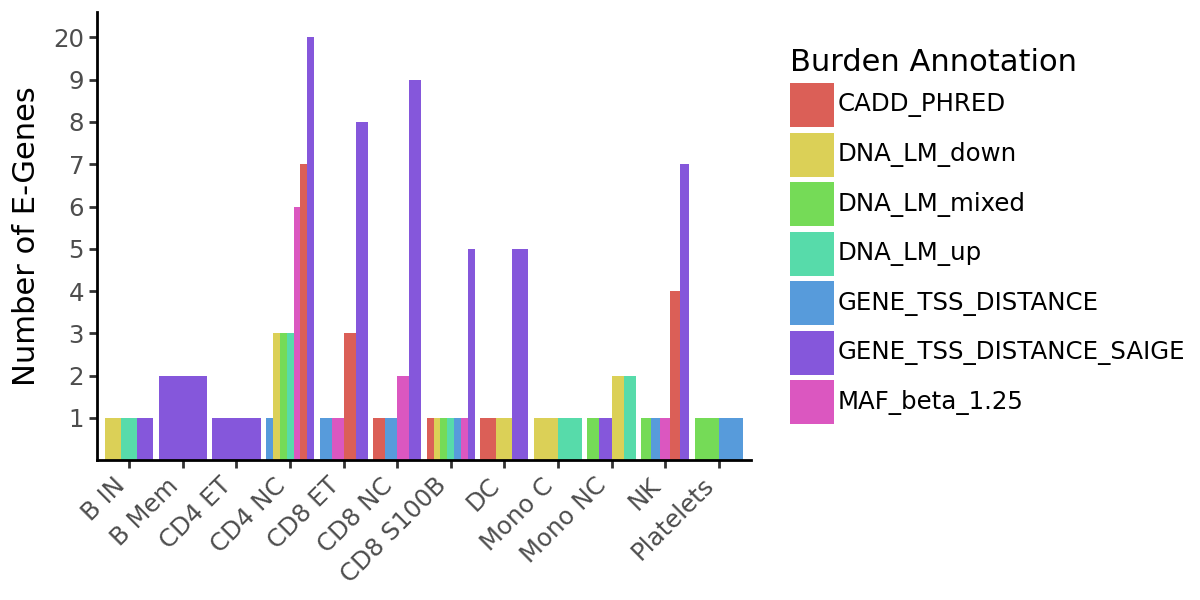

In [16]:
plot_egenes(df_to_plot_16)

[2025-01-28 14:57:44,481] INFO:matplotlib.font_manager: Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


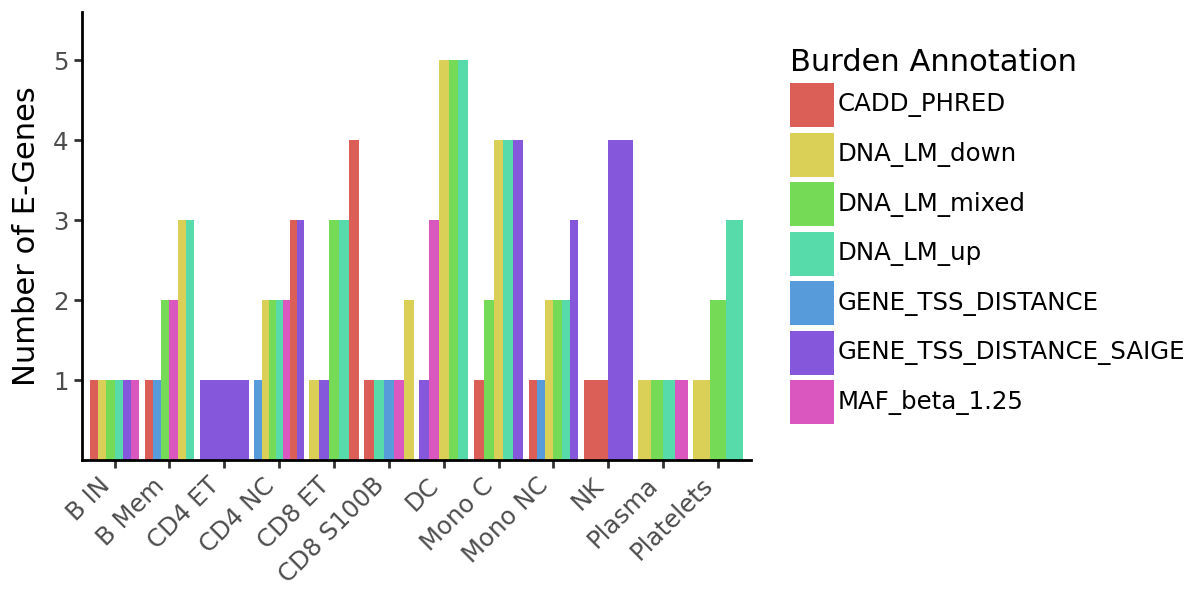

In [17]:
plot_egenes(df_to_plot_17)

In [18]:
df_to_plot_17

celltype               annotation  n               celltype_annotation
0      CD8 ET               CADD_PHRED  4                 CD8 ET_CADD_PHRED
1      CD8 ET                DNA_LM_up  3                  CD8 ET_DNA_LM_up
2      CD8 ET              DNA_LM_down  1                CD8 ET_DNA_LM_down
3      CD8 ET            MAF_beta_1.25  0              CD8 ET_MAF_beta_1.25
4      CD8 ET             DNA_LM_mixed  3               CD8 ET_DNA_LM_mixed
..        ...                      ... ..                               ...
100  CD4 SOX4              DNA_LM_down  0              CD4 SOX4_DNA_LM_down
101  CD4 SOX4            MAF_beta_1.25  0            CD4 SOX4_MAF_beta_1.25
102  CD4 SOX4             DNA_LM_mixed  0             CD4 SOX4_DNA_LM_mixed
103  CD4 SOX4        GENE_TSS_DISTANCE  0        CD4 SOX4_GENE_TSS_DISTANCE
104  CD4 SOX4  GENE_TSS_DISTANCE_SAIGE  0  CD4 SOX4_GENE_TSS_DISTANCE_SAIGE

[105 rows x 4 columns]

## QQ plots

In [50]:
def QQ_plot_sig_egenes(FDR_corrected_results, burdentype):
    """
    FDR_corrected_results: pd.DataFrame, output[0] of FDR_correction()
    burdentype: Str

    returns: QQ plot for given burden. Red line: uniform distributed pvalues. 
                                        in red: significant egens
    """
    df = FDR_corrected_results.copy().query("burden_type == @burdentype")

    df = df.sort_values("pvalue")
    df["-log10pval_expected"] = -np.log10(np.arange(1, len(df) + 1) / len(df))
    
    if "-log10pval" not in df.columns:
        df["-log10pval"] = -np.log10(df["pvalue"])
    
    aes_kwargs = dict(x="-log10pval_expected", y="-log10pval")
    plot = (
        ggplot(df, aes(**aes_kwargs, color="significant"))
        + labs(title=f"QQ plot for {burdentype}")
        + scale_color_manual(values = ["black", "red"])
        + theme_classic()
        + geom_abline(intercept=0, slope=1, color="red")
        + geom_point()
        + theme(legend_position="top", figure_size = (5,5))
    )
    return(plot)

[2025-01-28 15:27:27,388] INFO:matplotlib.font_manager: Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


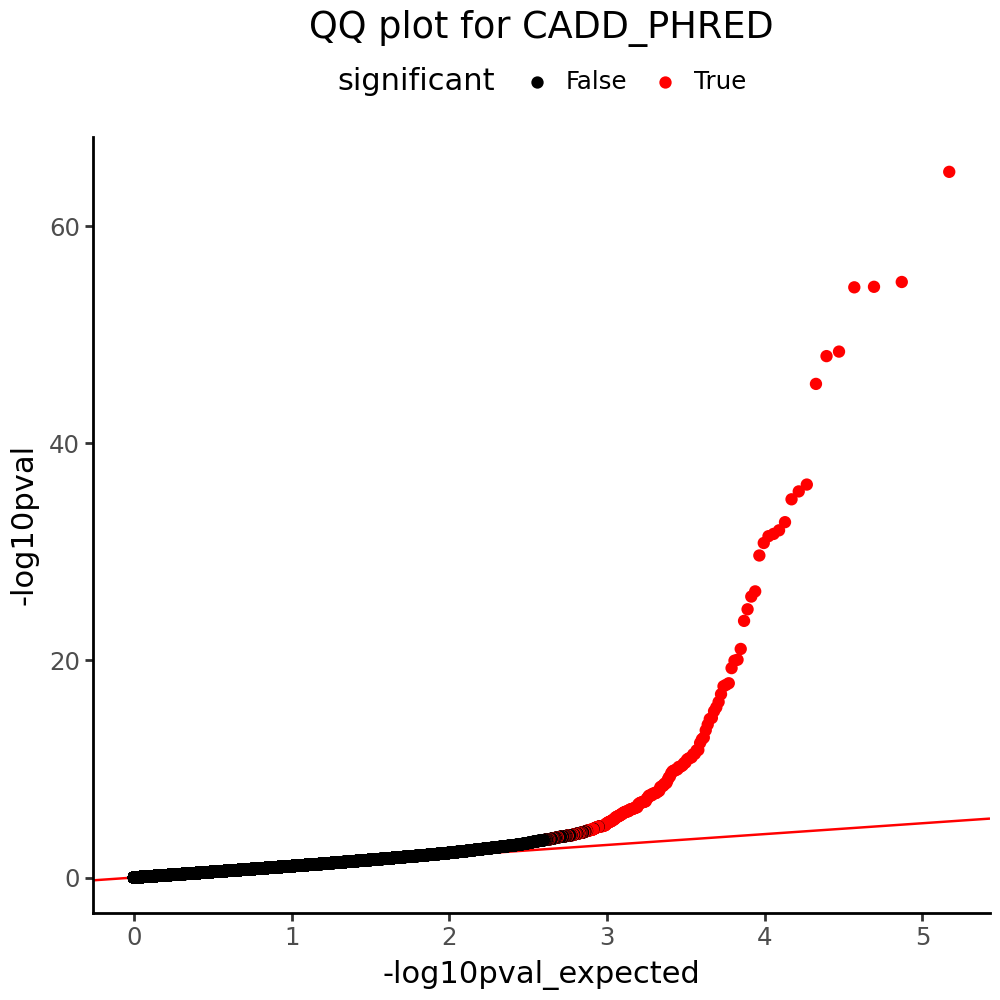

In [52]:
QQ_plot_sig_egenes(df_final, "CADD_PHRED")

[2025-01-28 15:27:01,398] INFO:matplotlib.font_manager: Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


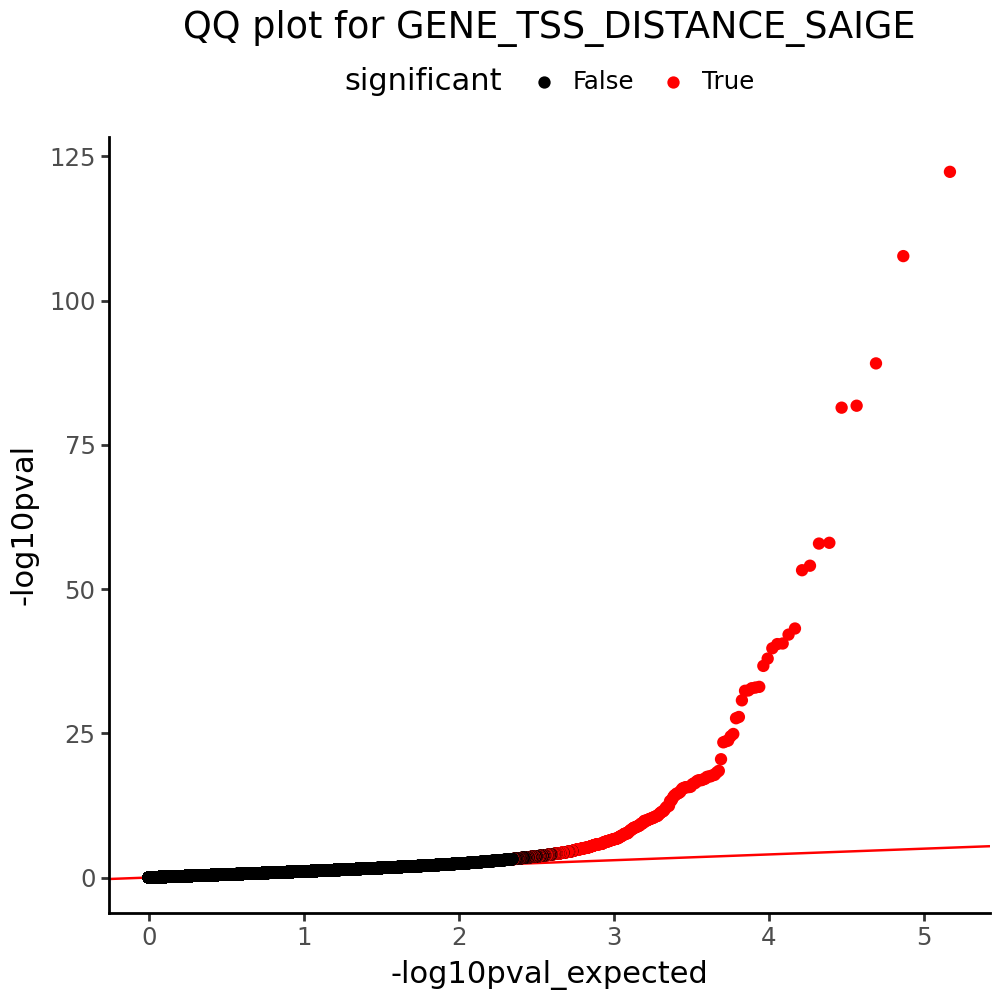

In [51]:
QQ_plot_sig_egenes(df_final, "GENE_TSS_DISTANCE_SAIGE")

[2025-01-28 15:27:32,736] INFO:matplotlib.font_manager: Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


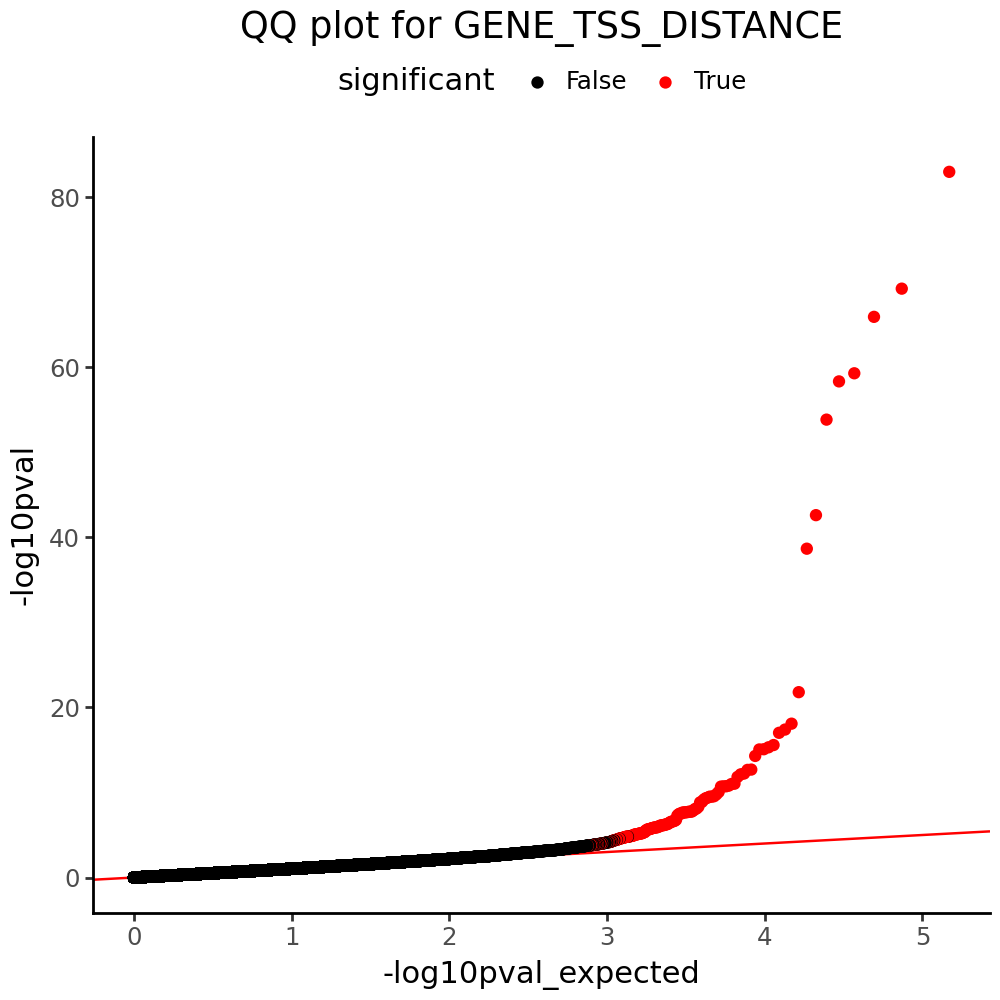

In [53]:
QQ_plot_sig_egenes(df_final, "GENE_TSS_DISTANCE")

[2025-01-28 15:28:52,413] INFO:matplotlib.font_manager: Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


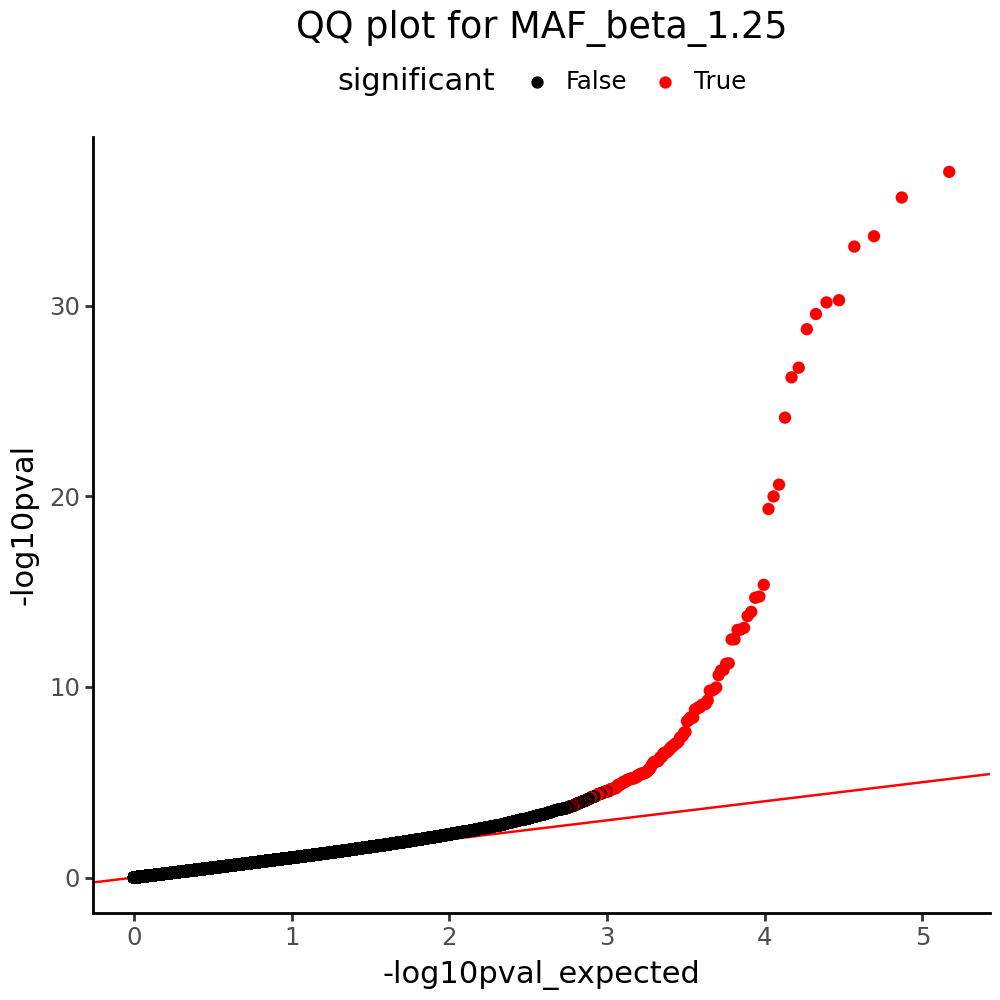

In [56]:
QQ_plot_sig_egenes(df_final, "MAF_beta_1.25")

[2025-01-28 15:29:38,401] INFO:matplotlib.font_manager: Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


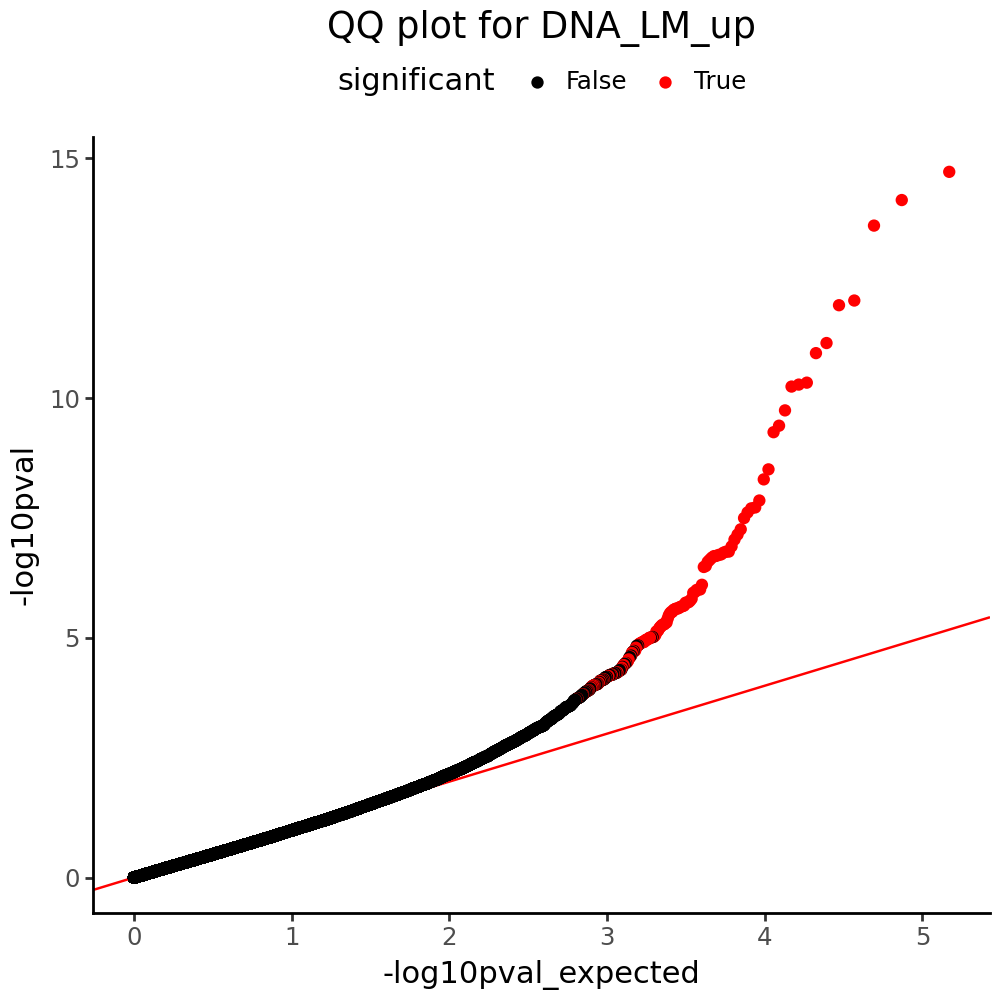

In [57]:
QQ_plot_sig_egenes(df_final, "DNA_LM_up")

[2025-01-28 15:30:14,123] INFO:matplotlib.font_manager: Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


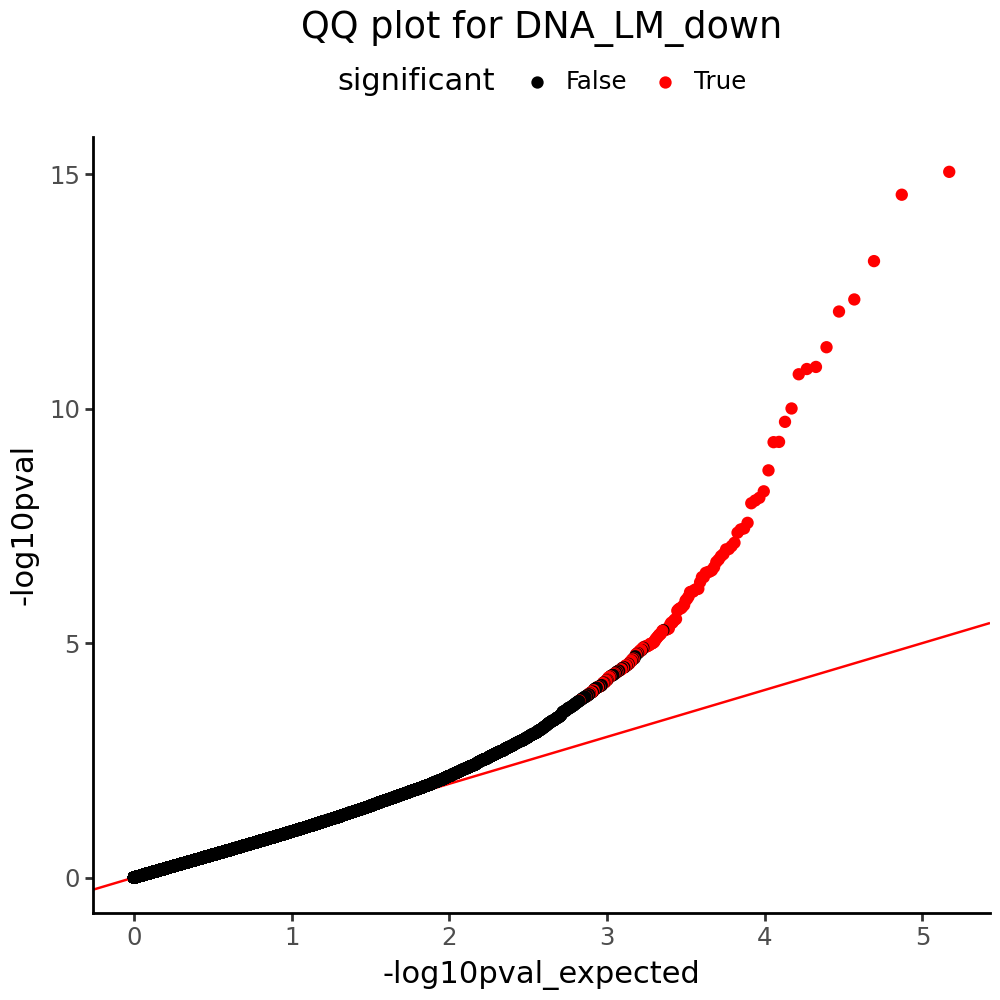

In [58]:
QQ_plot_sig_egenes(df_final, "DNA_LM_down")

[2025-01-28 15:30:53,732] INFO:matplotlib.font_manager: Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


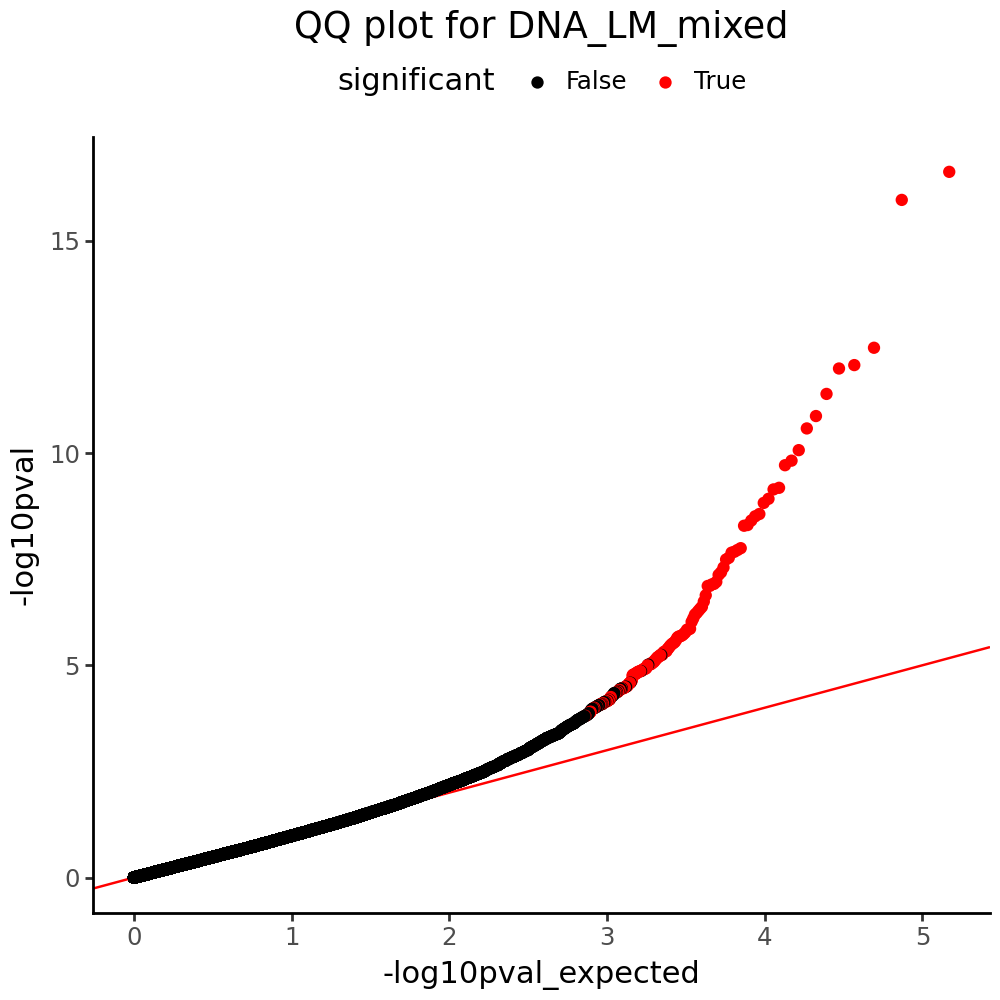

In [59]:
QQ_plot_sig_egenes(df_final, "DNA_LM_mixed")